# Prediction of behavior from image "happy or sad"

By using this model we can predict the human's behaviour. This model is classifier because it will predict happy or sad from the image

This model done by in this process of taking course and learning deep learning.

Data was downloaded form internter by using extension in chrome, so there is no specific data images.


In [1]:
#Importing libraries
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
data_dir = "/content/drive/MyDrive/ImageClassification-main/data"

In [3]:
image_extension = ["jpeg", "jpg", "bmp", "png"]

In [4]:
os.listdir(data_dir)

['happy', 'sad']

In [5]:
# Removing images with unsupported file extensions
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extension:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
            print('Issue with image {}'.format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ImageClassification-main/data')

Found 305 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

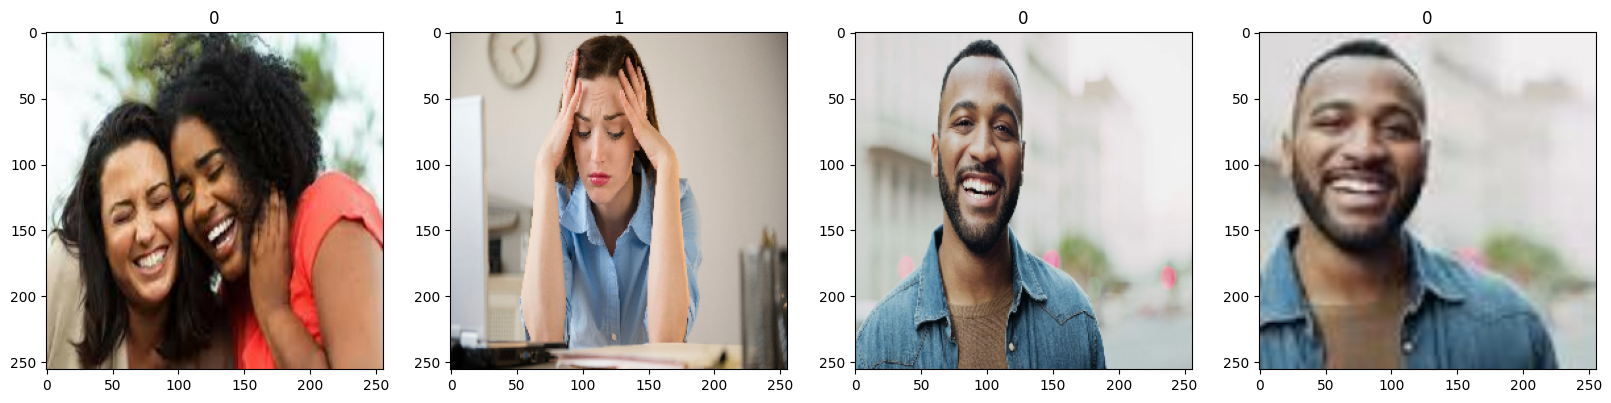

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 551ms/step - loss: 0.8178 - accuracy: 0.5134 - val_loss: 0.6871 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 8s 838ms/step - loss: 0.6806 - accuracy: 0.5402 - val_loss: 0.6380 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 7s 581ms/step - loss: 0.6209 - accuracy: 0.6339 - val_loss: 0.5292 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 8s 951ms/step - loss: 0.4458 - accuracy: 0.8125 - val_loss: 0.4239 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 6s 587ms/step - loss: 0.4235 - accuracy: 0.8259 - val_loss: 0.3960 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 8s 952ms/step - loss: 0.3338 - accuracy: 0.8527 - val_loss: 0.2545 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 6s 580ms/step - loss: 0.2242 - accuracy: 0.9330 - val_loss: 0.2094 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===

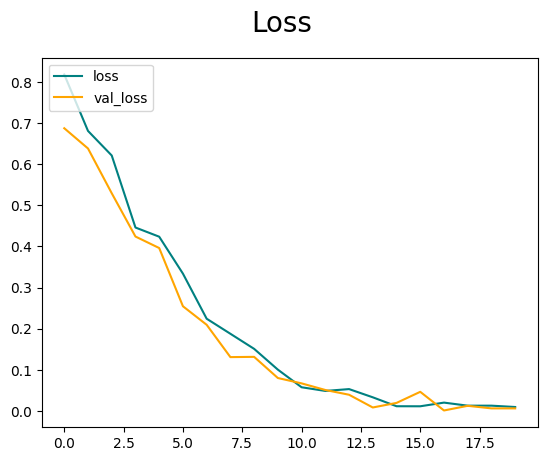

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

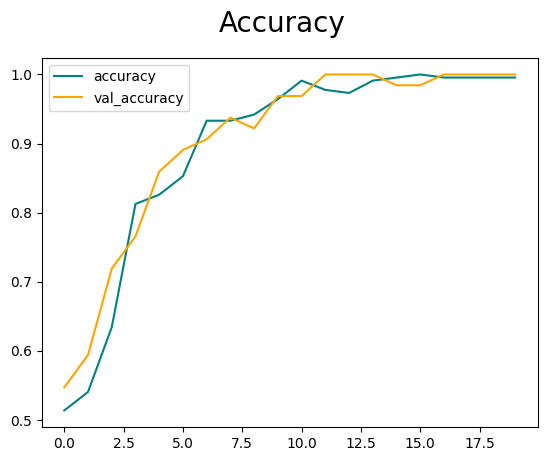

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 312ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing Data
In this part I am going to test the data from any image in internet


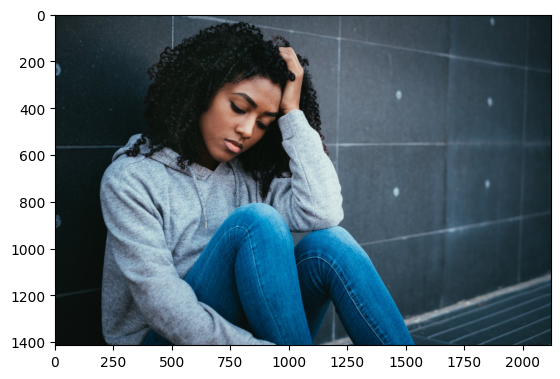

In [30]:
img = cv2.imread('/content/drive/MyDrive/sadd.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # This column makes add colors to photo
plt.show()

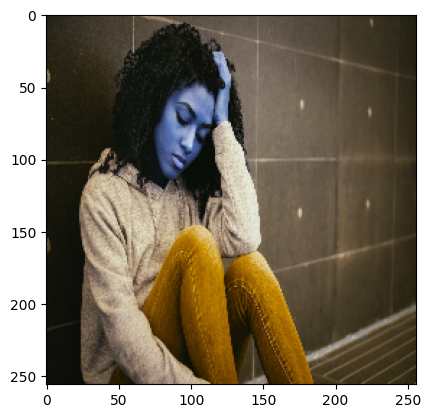

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [28]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 97ms/step


In [29]:
#If the prediction is less than 0.5 it means the prediction calss is funny on the otherhand sad if value is more than 0.5
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
